In [2]:
pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 117.5/117.5 kB 528.4 kB/s eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB 1.2 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33263 sha256=261e0b7b2848235e70abffc9dcf5dfaedf255f2665f67994d6338ae395c5a864
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import PyPDF2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
filename = 'C:\\Users\\User\\Desktop\\LDA Homabay\\LDA Output\\Chew\\chewr.pdf'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)
ind_manifesto.getDocumentInfo()

{'/ModDate': "D:20221103154541+03'00'", '/Creator': 'Nitro Pro 12'}

In [5]:
total_pages = ind_manifesto.numPages
total_pages

352

In [6]:
import textract
count = 0
text = ''
while(count < total_pages):
    mani_page = ind_manifesto.getPage(count)
    count += 1
    text += mani_page.extractText()

In [7]:
if text !='':
    text = text
    
else:
    textract.process(open_filename, method='tesseract')

In [8]:
pip install autocorrect

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def to_lower(text):
    #converting text to lowercase
    spell = Speller(lang='en')
    text = spell(text)
    return ' '.join([w.lower() for w in word_tokenize(text)])
lower_case = to_lower(text)
#print(lower_case)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#breaking individual text phrases into words using word_tokenize
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%', '...', '....']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [13]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
#print(clean_data)

In [14]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd

In [16]:
#saving data ito dataframes
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Topic']
df

,script
Topic,summary interview interviewer dr elizabeth ech...


In [17]:
#preprocessing -Bag of Words model
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [18]:
#Applt describing the frequency of words in a document
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaaaaa,aah,aamshwe,ab,ability,abl,able,abnormal,abo,...,zero,zidane,zikiisha,zilikuwa,zimelala,zinalalanga,zinc,zio,zone,zur
Topic,2,1,22,2,3,8,2,53,1,4,...,5,2,1,1,2,1,2,2,2,9


In [19]:
#vector representation showing frequency of words ised in the document
data = data_vect_feat.transpose()
data

,Topic
aaa,2
aaaaaa,1
aah,22
aamshwe,2
ab,3
...,...
zinalalanga,1
zinc,2
zio,2
zone,2


In [20]:
#retrieving top 100 most common words from the document into wordcloud for visualization
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 100 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))

key Topic, value [('yeah', 828), ('community', 615), ('mmm', 590), ('yes', 571), ('okay', 549), ('cap', 530), ('ch', 471), ('like', 418), ('facility', 357), ('maybe', 313), ('work', 287), ('household', 286), ('know', 285), ('come', 270), ('time', 263), ('training', 261), ('health', 235), ('people', 196), ('village', 187), ('px', 186), ('referral', 177), ('good', 172), ('say', 163), ('tell', 148), ('role', 148), ('need', 146), ('en', 145), ('challenge', 145), ('information', 144), ('thank', 136), ('day', 136), ('thing', 135), ('person', 134), ('th', 131), ('want', 130), ('given', 128), ('county', 128), ('ee', 125), ('month', 123), ('service', 123), ('area', 123), ('uh', 121), ('case', 112), ('na', 112), ('problem', 110), ('form', 110), ('trained', 106), ('member', 104), ('somebody', 101), ('example', 100), ('report', 100), ('malaria', 99), ('refer', 98), ('partner', 96), ('let', 96), ('support', 95), ('child', 94), ('level', 92), ('talk', 90), ('drug', 88), ('way', 87), ('mother', 85), 

In [21]:
#add top 100 common words to our stop words list
from collections import Counter
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:100])

['yeah', 'community', 'mmm', 'yes', 'okay', 'cap', 'ch', 'like', 'facility', 'maybe', 'work', 'household', 'know', 'come', 'time', 'training', 'health', 'people', 'village', 'px', 'referral', 'good', 'say', 'tell', 'role', 'need', 'en', 'challenge', 'information', 'thank', 'day', 'thing', 'person', 'th', 'want', 'given', 'county', 'ee', 'month', 'service', 'area', 'uh', 'case', 'na', 'problem', 'form', 'trained', 'member', 'somebody', 'example', 'report', 'malaria', 'refer', 'partner', 'let', 'support', 'child', 'level', 'talk', 'drug', 'way', 'mother', 'make', 'use', 'home', 'right', 'mentioned', 'supervision', 'oh', 'train', 'said', 'data', 'help', 'patient', 'year', 'place', 'hospital', 'visit', 'look', 'incentive', 'chief', 'working', 'population', 'group', 'normally', 'monthly', 'number', 'unit', 'end', 'bring', 'supposed', 'selection', 'ka', 'usually', 'stipend', 'link', 'dialogue', 'government', 'issue', 'used']


In [22]:
#next removal of stopwords
nltk.download('stopwords')
nltk.download('tokenize')
stop_words=set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading tokenize: Package 'tokenize' not found in
[nltk_data]     index


In [23]:
pip install mosestokenizer

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


C:\Users\User\AppData\Local\Temp\ipykernel_5032\1927075461.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread("C:/Users/User/Desktop/LDA Homabay/white.jpg")
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is depreca

C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is No

C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\User\anaconda3\lib\site-packages\word

C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\User\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\User\anaconda3\lib\site-packages\word

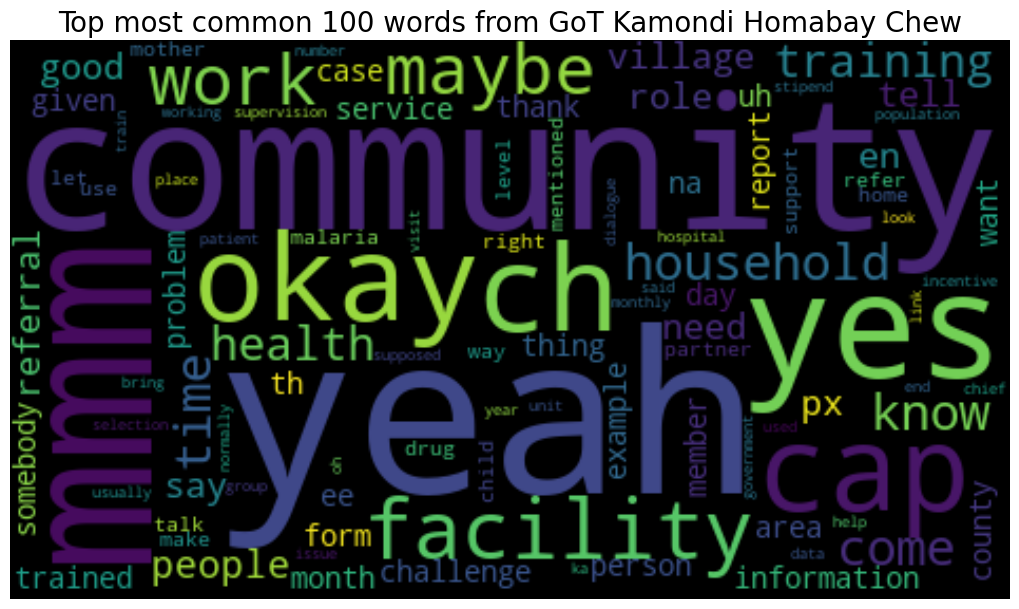

In [69]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
img1 = imageio.imread("C:/Users/User/Desktop/LDA Homabay/white.jpg")
hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from GoT Kamondi Homabay Chew",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('C:\\Users\\User\\Desktop\\LDA Homabay\\LDA Output\\WordCloud_Visualisation\\Chew_top_100.jpeg')

In [26]:
#This is a set of Natural Language Processing (NLP) technique of analysing,
#identifying and categorizing opinions expressed in a piece of text, 
#in order to determine whether the writer's attitude towards a particular topic, product,
#politics, services, brands etc. is positive, negative, or neutral.
#This data holds immense value in the fields of marketing analysis, public relations, product reviews, net promoter scoring, product feedback, and customer service, for example.

In [27]:
pip install vaderSentiment

In [28]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [29]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [30]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.18377358227518215, subjectivity=0.4447795564850743)

# Text summarization
##produce a concise and fluent summary of the document with extraction(generate summary from document) and abstraction (generate summary from NL genertion technique).

In [31]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Importing all the necessary libraries
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [33]:
#creating a vector between two sentences
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)
 
# One out of 5 words differ => 0.8 similarity
print(sentence_similarity("This is a good sentence".split(), "This is a bad sentence".split()))
 
# One out of 2 non-stop words differ => 0.5 similarity
print(sentence_similarity("This is a good sentence".split(), "This is a bad sentence".split(), stopwords.words('english')))
 
# 0 out of 2 non-stop words differ => 1 similarity (identical sentences)
print(sentence_similarity("This is a good sentence".split(), "This is a good sentence".split(), stopwords.words('english')))
 
# Completely different sentences=> 0.0
print(sentence_similarity("This is a good sentence".split(), "I want to go to the market".split(), stopwords.words('english')))

0.7999999999999998
0.4999999999999999
0.9999999999999998
0.0


In [34]:
# get the english list of stopwords
#stop_words = stopwords.words('english')
 
def build_similarity_matrix(lower_case, stopwords=None):
    # Create an empty similarity matrix
    S = np.zeros([len(lower_case), len(lower_case)])
 
 
    for idx1 in range(len(lower_case)):
        for idx2 in range(len(lower_case)):
            if idx1 == idx2:
                continue
 
            S[idx1][idx2] = sentence_similarity(lower_case[idx1], lower_case[idx2], stop_words)
 
    # normalize the matrix row-wise
    for idx in range(len(S)):
        S[idx] /= S[idx].sum()
 
    return S

In [66]:
#Lets define a function to genrate our summary of the whole document.
def generate_summary(lower_case, top_n=5):
    #Read text and tokenize
    lower_case  = nltk.word_tokenize(lower_case)
    
   
    
    #Generate similarity matrix across sentences
    sentence_similarity  = build_similarity_matrix((lower_case, stop_words))
    
    #Rank sentences in similarity matrix
    sentence_similiraty_graph = nx.from_numpy_array(sentence_similarity)
    scores = nx.pagerank(sentence_similiraty_graph)
    
    
    #Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(lower_case)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence) 
    
    for i in range(top_n):
        summarize_text.append(' '.join(ranked_sentence[i][1]))
        
print( nltk.word_tokenize(lower_case))

['summary', 'of', 'interview', 'interviewer', ':', 'dr', 'elizabeth', 'echo', 'date', ':', '03', 'march', '2020', 'data', 'collection', 'site', ':', 'got', 'kandi', 'dispensary', 'total', 'length', 'of', 'audio-recording', ':', 'participant', 'type/group', '(', 'please', 'bold', ')', ':', 'ii', 'he', 'data', 'collection', 'event', 'summary', ':', '(', 'please', 'note', 'anything', 'here', 'that', 'you', 'think', 'would', 'be', 'important', 'for', 'the', 'research', 'team', 'to', 'know', ',', 'such', 'as', 'any', 'distractions', 'that', 'occurred', 'during', 'the', 'interview', '.', 'also', 'note', 'any', 'reasons', 'you', 'might', 'have', 'concerns', 'about', 'the', 'data', '.', ')', 'transcription', 'please', 'type', 'out', 'all', 'questions', 'and', 'responses', 'exactly', 'how', 'they', 'are', 'stated', 'in', 'the', 'audio-recording', '.', 'please', 'type', 'any', 'notes', 'to', 'the', 'reader', '(', 'e.g', '.', 'description', 'on', 'of', 'what', 'is', 'happening', ',', 'interruptio

In [67]:
from nltk.corpus import stopwords 
stop = set(stopwords.words('english')) 
from nltk.corpus import stopwords 
def remove_stopword(word): 
    return word not in nltk.word_tokenize(lower_case) 
print(words)

['yeah', 'community', 'mmm', 'yes', 'okay', 'cap', 'ch', 'like', 'facility', 'maybe', 'work', 'household', 'know', 'come', 'time', 'training', 'health', 'people', 'village', 'px', 'referral', 'good', 'say', 'tell', 'role', 'need', 'en', 'challenge', 'information', 'thank', 'day', 'thing', 'person', 'th', 'want', 'given', 'county', 'ee', 'month', 'service', 'area', 'uh', 'case', 'na', 'problem', 'form', 'trained', 'member', 'somebody', 'example', 'report', 'malaria', 'refer', 'partner', 'let', 'support', 'child', 'level', 'talk', 'drug', 'way', 'mother', 'make', 'use', 'home', 'right', 'mentioned', 'supervision', 'oh', 'train', 'said', 'data', 'help', 'patient', 'year', 'place', 'hospital', 'visit', 'look', 'incentive', 'chief', 'working', 'population', 'group', 'normally', 'monthly', 'number', 'unit', 'end', 'bring', 'supposed', 'selection', 'ka', 'usually', 'stipend', 'link', 'dialogue', 'government', 'issue', 'used', 'mm', 'going', 'client', 'meeting', 'told', 'job', 'able', 'stock',

# Found an error in generating the summary, opting for an alternative lib.
## ambayo ni gensim, hope it works

In [37]:
pip install gensim==3.4.0

Note: you may need to restart the kernel to use updated packages.


In [70]:
# imports
from gensim.summarization.summarizer import summarize

In [71]:
print(summarize(lower_case))

note from translator m : we just want to have some insights from you as t he he supervising caps on the caps functionality , how they work , the good things about their work , the challenges and this is information that will contribute towards the simple estation of the hc as the government plans for the roll out .
so maybe some background information about your work as a he , and how many community u its you have , how many caps and how they are distributed…maybe we start there .
r : yes i am kennedy solo , am a public health office er and i also do the work of a he , under me i have 4 community units , that is mini a that has got 10 caps , mini b has got 10 caps , then i have otero with 10 caps and kokungotu east with 10 caps .
kokungotu east and otero community units are linked to otero level four hospital and mini a and mini b whom we have here seated are linked to this facility y called got kandi which is a dispensary .
th e caps fall under the community health strategy…the main r

In [72]:
#lets use spacy for second lemmatization of our data
#keeping only NOUNS, ADV, VERBS, ADJ
import spacy
from spacy.cli.download import download
download(model="en_core_web_sm")

def lemmatization(clean_text, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_output = []
    for sent in clean_text:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB'])

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


TypeError: sequence item 0: expected str instance, list found

In [41]:
print(data_lemmatized)

[['o', 'p', 'i', 'c']]


# Topic modelling using LDA

In [42]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install pyLDAvis==3.3.1

Note: you may need to restart the kernel to use updated packages.


In [44]:
conda install -c conda-forge pyldavis


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done



In [45]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
#import graphlab as gl
#import pyLDAvis.graphlab
#import pyLDAvis.gensim_models as gensimvis  
import pyLDAvis.gensim_models

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

C:\Users\User\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [46]:
#creating dictionary and corpus
data  = []
data.append(data_lemmatized)

In [47]:
#print(text)

In [48]:
#print(stop_words)

In [49]:
from gensim.summarization.summarizer import summarize
print(summarize(lower_case))

note from translator m : we just want to have some insights from you as t he he supervising caps on the caps functionality , how they work , the good things about their work , the challenges and this is information that will contribute towards the simple estation of the hc as the government plans for the roll out .
so maybe some background information about your work as a he , and how many community u its you have , how many caps and how they are distributed…maybe we start there .
r : yes i am kennedy solo , am a public health office er and i also do the work of a he , under me i have 4 community units , that is mini a that has got 10 caps , mini b has got 10 caps , then i have otero with 10 caps and kokungotu east with 10 caps .
kokungotu east and otero community units are linked to otero level four hospital and mini a and mini b whom we have here seated are linked to this facility y called got kandi which is a dispensary .
th e caps fall under the community health strategy…the main r

In [50]:
print(clean_text(lower_case))

['summary', 'interview', 'interviewer', 'dr', 'elizabeth', 'echo', 'date', 'march', 'data', 'collection', 'site', 'got', 'kandi', 'dispensary', 'total', 'length', 'participant', 'please', 'bold', 'ii', 'data', 'collection', 'event', 'summary', 'please', 'note', 'anything', 'think', 'would', 'important', 'research', 'team', 'know', 'distractions', 'occurred', 'interview', 'also', 'note', 'reasons', 'might', 'concerns', 'data', 'transcription', 'please', 'type', 'questions', 'responses', 'exactly', 'stated', 'please', 'type', 'notes', 'reader', 'description', 'happening', 'interruption', 'laughter', 'brackets', 'note', 'translator', 'want', 'insights', 'supervising', 'caps', 'caps', 'functionality', 'work', 'good', 'things', 'work', 'challenges', 'information', 'contribute', 'towards', 'simple', 'estation', 'hc', 'government', 'plans', 'roll', 'start', 'start', 'already', 'told', 'work', 'public', 'health', 'officer', 'also', 'c', 'en', 'maybe', 'background', 'information', 'work', 'many

In [51]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install spacy==2.3.5

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install -U spacy==2.1.3

  Using cached spacy-2.1.3.tar.gz (27.7 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [311 lines of output]
    Using cached setuptools-65.5.1-py3-none-any.whl (1.2 MB)
    Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
    Using cached Cython-0.29.32-py2.py3-none-any.whl (986 kB)
    Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
    Using cached preshed-2.0.1.tar.gz (113 kB)
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'done'
    Using cached murmurhash-1.0.9-cp39-cp39-win_amd64.whl (18 kB)
    Using cached thinc-7.0.0.dev6.tar.gz (1.9 MB)
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'done'
    Using cached blis-0.2.4.tar.gz (1.5 MB)
    Preparing metadata (setup.py): started
    Preparing metadata (setup.py): finished with status 'done'
    Using cached thinc_gpu_ops-0.0.4-py3-none-any.whl
    Using cached numpy-1.2

In [68]:
#creating dictionary and corpus
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized

#term document frequency and viewing
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


In [56]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('c', 1), ('i', 1), ('o', 1), ('p', 1)]]

In [57]:
#building the topic model with LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=id2word, 
                                            alpha='auto', 
                                            num_topics=6,
                                            random_state=2021,
                                            update_every=1, 
                                            chunksize=100,
                                            passes=10,
                                            per_word_topics=True)
lda_model, corpus, id2word

C:\Users\User\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\User\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
C:\Users\User\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)

(<gensim.models.ldamodel.LdaModel at 0x1feab5b9160>,
 [[(0, 1), (1, 1), (2, 1), (3, 1)]],
 <gensim.corpora.dictionary.Dictionary at 0x1feab4fe1c0>)

In [58]:
#viewing the topics in our model sasa
print(lda_model.print_topics())
doc_lda  = lda_model[corpus]
print('\n')
print(doc_lda)

[(0, '0.250*"c" + 0.250*"o" + 0.250*"i" + 0.250*"p"'), (1, '0.250*"p" + 0.250*"o" + 0.250*"i" + 0.250*"c"'), (2, '0.250*"p" + 0.250*"i" + 0.250*"o" + 0.250*"c"'), (3, '0.250*"p" + 0.250*"i" + 0.250*"o" + 0.250*"c"'), (4, '0.250*"p" + 0.250*"c" + 0.250*"i" + 0.250*"o"'), (5, '0.250*"p" + 0.250*"i" + 0.250*"c" + 0.250*"o"')]




In [59]:
for index, topic in lda_model.show_topics(formatted=False, num_words= 10):
    print('Topic: {} \n \n Words: {} \n \n'.format(index, [w[0] for w in topic]))

Topic: 0 
 
 Words: ['c', 'o', 'i', 'p'] 
 

Topic: 1 
 
 Words: ['p', 'o', 'i', 'c'] 
 

Topic: 2 
 
 Words: ['p', 'i', 'o', 'c'] 
 

Topic: 3 
 
 Words: ['p', 'i', 'o', 'c'] 
 

Topic: 4 
 
 Words: ['p', 'c', 'i', 'o'] 
 

Topic: 5 
 
 Words: ['p', 'i', 'c', 'o'] 
 



# Model Perplexity and Coherence Score

In [60]:
#view model perplexity
print('\nPerplexity:', lda_model.log_perplexity(corpus))


Perplexity: -2.4789978936314583


C:\Users\User\anaconda3\lib\site-packages\gensim\models\ldamodel.py:826: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)


In [61]:
#what about the cohrence score
coherence_model_lda = CoherenceModel(lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

Coherence Score: 1.0


# Visualizing sasa

In [62]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

C:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=         x    y  topics  cluster       Freq
topic                                      
0     -0.0 -0.0       1        1  94.899877
2      0.0 -0.0       2        1   1.020381
5      0.0  0.0       3        1   1.020313
1     -0.0 -0.0       4        1   1.019959
3      0.0 -0.0       5        1   1.019877
4     -0.0  0.0       6        1   1.019594, topic_info=  Term      Freq     Total Category  logprob  loglift
0    c  1.000000  1.000000  Default   4.0000      4.0
2    o  1.000000  1.000000  Default   3.0000      3.0
1    i  1.000000  1.000000  Default   2.0000      2.0
3    p  0.000000  0.000000  Default   1.0000      1.0
0    c  0.949002  1.000003   Topic1  -1.3863      0.0
2    o  0.949001  1.000002   Topic1  -1.3863      0.0
1    i  0.949000  1.000001   Topic1  -1.3863      0.0
3    p  0.948992  0.999994   Topic1  -1.3863     -0.0
3    p  0.010204  0.999994   Topic2  -1.3863      0.0
1    i  0.010204  1.000001   Topic2  -1.3863     -0.0
2    o  0.010204  1.000002   Topic2  -1.3863     -0.0
0    c  0.010204  1.000003   Topic2  -1.3863     -0.0
3    p  0.010203  0.999994   Topic3  -1.3863      0.0
1    i  0.010203  1.000001   Topic3  -1.3863     -0.0
0    c  0.010203  1.000003   Topic3  -1.3863     -0.0
2    o  0.010203  1.000002   Topic3  -1.3863     -0.0
3    p  0.010200  0.999994   Topic4  -1.3863      0.0
1    i  0.010200  1.000001   Topic4  -1.3863     -0.0
2    o  0.010200  1.000002   Topic4  -1.3863     -0.0
0    c  0.010200  1.000003   Topic4  -1.3863     -0.0
3    p  0.010199  0.999994   Topic5  -1.3863      0.0
1    i  0.010199  1.000001   Topic5  -1.3863     -0.0
2    o  0.010199  1.000002   Topic5  -1.3863     -0.0
0    c  0.010199  1.000003   Topic5  -1.3863     -0.0
3    p  0.010196  0.999994   Topic6  -1.3863      0.0
1    i  0.010196  1.000001   Topic6  -1.3863     -0.0
0    c  0.010196  1.000003   Topic6  -1.3863     -0.0
2    o  0.010196  1.000002   Topic6  -1.3863     -0.0, token_table=      Topic      Freq Term
term                      
0         1  0.999997    c
1         1  0.999999    i
2         1  0.999998    o
3         1  1.000006    p, R=4, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 6, 2, 4, 5])

In [63]:
pip install pywin32

Note: you may need to restart the kernel to use updated packages.


In [64]:
from win32com.client import Dispatch
def speak(str1):
    speak=Dispatch(("SAPI.SpVoice"))
    speak.Speak(str1)

speak("Conclusion. From the draft working with data from Kamondi Homabay County, and the generated five topics, we can conclude that Topics, Infrastructure and Transport, and Drugs and Medicine are the most dominant.")